# Import Module

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

# Import Dataset

In [2]:
col_name = ['engine', 'time', 'op_cond_1', 'op_cond_2', 'op_cond_3'] # Buat nama kolom
col_name = col_name + ['sn_{}'.format(s + 1) for s in range(21)]
df = pd.read_csv('train_FD001.txt',  header=None, names=col_name,delim_whitespace=True,index_col=0) 
df.head(100)

,time,op_cond_1,op_cond_2,op_cond_3,sn_1,sn_2,sn_3,sn_4,sn_5,sn_6,...,sn_12,sn_13,sn_14,sn_15,sn_16,sn_17,sn_18,sn_19,sn_20,sn_21
engine,,,,,,,,,,,,,,,,,,,,,
1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,21.61,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,21.61,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,21.61,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,21.61,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,21.61,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1,96,-0.0034,0.0001,100.0,518.67,642.19,1584.07,1395.16,14.62,21.61,...,521.66,2388.06,8130.69,8.4311,0.03,392,2388,100.0,38.88,23.3255
1,97,0.0035,-0.0003,100.0,518.67,642.07,1595.77,1407.81,14.62,21.61,...,521.67,2388.06,8128.74,8.4105,0.03,392,2388,100.0,39.01,23.2963
1,98,0.0006,0.0004,100.0,518.67,642.00,1591.11,1404.56,14.62,21.61,...,522.31,2388.06,8127.89,8.4012,0.03,391,2388,100.0,38.96,23.2554


# DATA PREPROCESSING

In [3]:
df.info() # cek data

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20631 entries, 1 to 100
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   time       20631 non-null  int64  
 1   op_cond_1  20631 non-null  float64
 2   op_cond_2  20631 non-null  float64
 3   op_cond_3  20631 non-null  float64
 4   sn_1       20631 non-null  float64
 5   sn_2       20631 non-null  float64
 6   sn_3       20631 non-null  float64
 7   sn_4       20631 non-null  float64
 8   sn_5       20631 non-null  float64
 9   sn_6       20631 non-null  float64
 10  sn_7       20631 non-null  float64
 11  sn_8       20631 non-null  float64
 12  sn_9       20631 non-null  float64
 13  sn_10      20631 non-null  float64
 14  sn_11      20631 non-null  float64
 15  sn_12      20631 non-null  float64
 16  sn_13      20631 non-null  float64
 17  sn_14      20631 non-null  float64
 18  sn_15      20631 non-null  float64
 19  sn_16      20631 non-null  float64
 20  sn_17   

# EKSPLORASI DATA (VISUALISASI)

In [4]:
def plot_ts(df, engine_num=3): # Buat fungsi visualisasi
    
    # siapkan dataframe untuk diplot
    ts = df.loc[engine_num].copy()  
    time = ts['time']
    ts.drop(labels=['time'],axis=1,inplace=True)
    cols = ts.columns
    
    # plotting
    fig, axes = plt.subplots(len(cols), 1, figsize=(19,17))
    for col, ax in zip(cols, axes):
        ax.plot(time,ts[col],label=col)
        ax.legend(loc=2)    
    fig.suptitle('Engine #: {}'.format(engine_num))

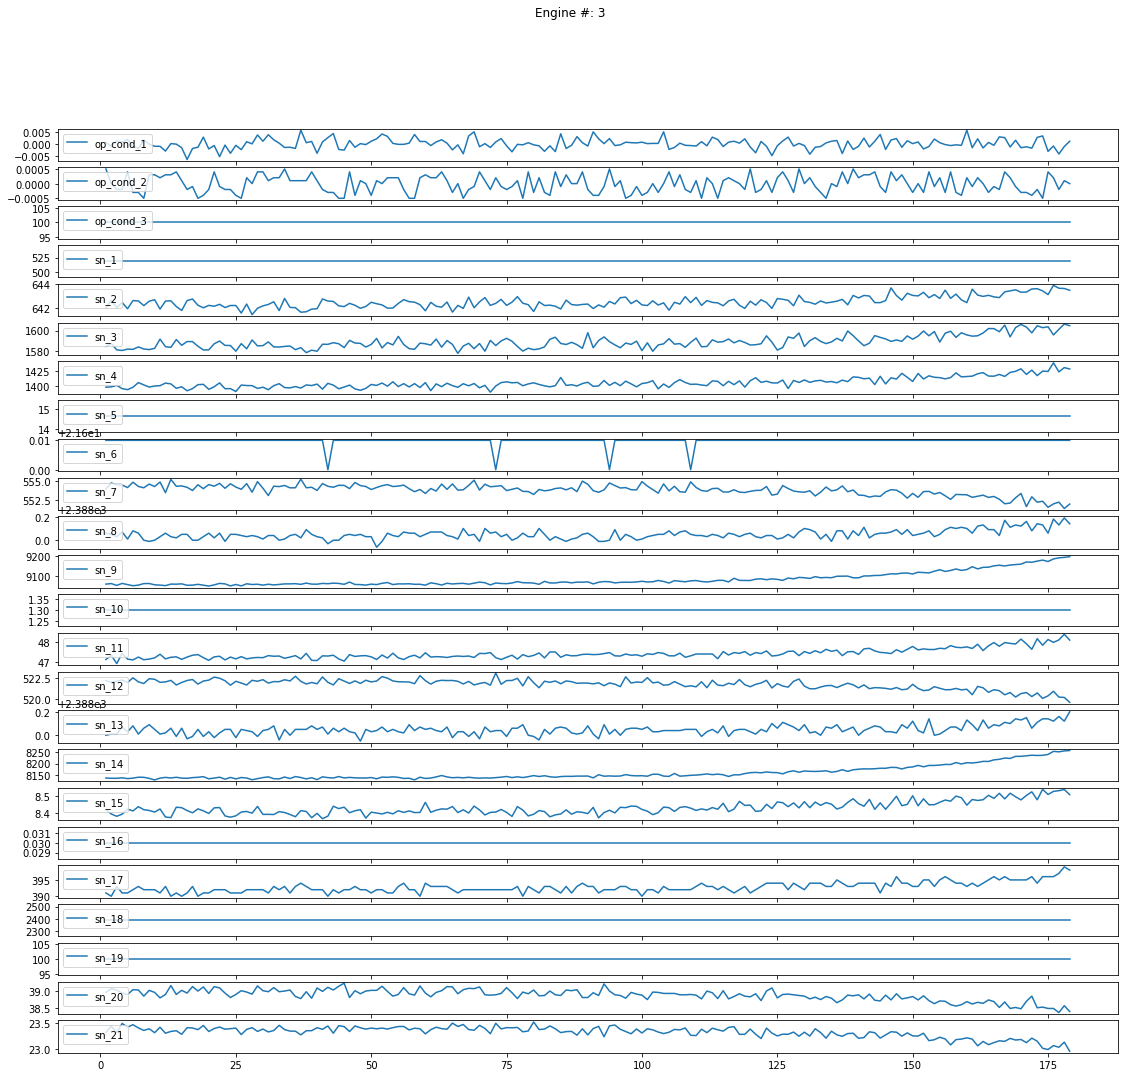

In [5]:
plot_ts(df, 3)

In [6]:
df

,time,op_cond_1,op_cond_2,op_cond_3,sn_1,sn_2,sn_3,sn_4,sn_5,sn_6,...,sn_12,sn_13,sn_14,sn_15,sn_16,sn_17,sn_18,sn_19,sn_20,sn_21
engine,,,,,,,,,,,,,,,,,,,,,
1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,21.61,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,21.61,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,21.61,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,21.61,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,21.61,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,196,-0.0004,-0.0003,100.0,518.67,643.49,1597.98,1428.63,14.62,21.61,...,519.49,2388.26,8137.60,8.4956,0.03,397,2388,100.0,38.49,22.9735
100,197,-0.0016,-0.0005,100.0,518.67,643.54,1604.50,1433.58,14.62,21.61,...,519.68,2388.22,8136.50,8.5139,0.03,395,2388,100.0,38.30,23.1594
100,198,0.0004,0.0000,100.0,518.67,643.42,1602.46,1428.18,14.62,21.61,...,520.01,2388.24,8141.05,8.5646,0.03,398,2388,100.0,38.44,22.9333


Hapus data yang tidak punya trend degradasi

In [7]:
raw_columns = df.columns.values[1:-1]
raw_columns

array(['op_cond_1', 'op_cond_2', 'op_cond_3', 'sn_1', 'sn_2', 'sn_3',
       'sn_4', 'sn_5', 'sn_6', 'sn_7', 'sn_8', 'sn_9', 'sn_10', 'sn_11',
       'sn_12', 'sn_13', 'sn_14', 'sn_15', 'sn_16', 'sn_17', 'sn_18',
       'sn_19', 'sn_20'], dtype=object)

In [8]:
df.drop (['op_cond_1', 'op_cond_2', 'op_cond_3','sn_1', 'sn_5', 'sn_6', 'sn_9','sn_10','sn_16','sn_18','sn_19' ], axis=1,inplace=True)

In [9]:
raw_columns = df.columns.values[1:-1]
raw_columns

array(['sn_2', 'sn_3', 'sn_4', 'sn_7', 'sn_8', 'sn_11', 'sn_12', 'sn_13',
       'sn_14', 'sn_15', 'sn_17', 'sn_20'], dtype=object)

In [10]:
df.shape

(20631, 14)

In [11]:
df.head()

,time,sn_2,sn_3,sn_4,sn_7,sn_8,sn_11,sn_12,sn_13,sn_14,sn_15,sn_17,sn_20,sn_21
engine,,,,,,,,,,,,,,
1,1,641.82,1589.70,1400.60,554.36,2388.06,47.47,521.66,2388.02,8138.62,8.4195,392,39.06,23.4190
1,2,642.15,1591.82,1403.14,553.75,2388.04,47.49,522.28,2388.07,8131.49,8.4318,392,39.00,23.4236
1,3,642.35,1587.99,1404.20,554.26,2388.08,47.27,522.42,2388.03,8133.23,8.4178,390,38.95,23.3442
1,4,642.35,1582.79,1401.87,554.45,2388.11,47.13,522.86,2388.08,8133.83,8.3682,392,38.88,23.3739
1,5,642.37,1582.85,1406.22,554.00,2388.06,47.28,522.19,2388.04,8133.80,8.4294,393,38.90,23.4044


# Standarisasi Data

In [12]:
raw_sensors = df[raw_columns].values
Std = StandardScaler()
standard_sensors = Std.fit_transform(raw_sensors)
standard_sensors
df_1 = pd.DataFrame(standard_sensors, columns = ['sn_2','sn_3','sn_4', 'sn_7','sn_8','sn_11','sn_12','sn_13','sn_14','sn_15','sn_17','sn_20'])
df_1.head()

,sn_2,sn_3,sn_4,sn_7,sn_8,sn_11,sn_12,sn_13,sn_14,sn_15,sn_17,sn_20
0,-1.721725,-0.134255,-0.925936,1.121141,-0.516338,-0.266467,0.334262,-1.058890,-0.269071,-0.603816,-0.781710,1.348493
1,-1.061780,0.211528,-0.643726,0.431930,-0.798093,-0.191583,1.174899,-0.363646,-0.642845,-0.275852,-0.781710,1.016528
2,-0.661813,-0.413166,-0.525953,1.008155,-0.234584,-1.015303,1.364721,-0.919841,-0.551629,-0.649144,-2.073094,0.739891
3,-0.661813,-1.261314,-0.784831,1.222827,0.188048,-1.539489,1.961302,-0.224597,-0.520176,-1.971665,-0.781710,0.352598
4,-0.621816,-1.251528,-0.301518,0.714393,-0.516338,-0.977861,1.052871,-0.780793,-0.521748,-0.339845,-0.136018,0.463253


# Analisis Trend Degradasi menggunakan slopes / gradien

In [13]:
lin_model =LinearRegression()
engine_num=3    
for id in df.index.unique():
    df.loc[id,'cycles'] = df.loc[id]['time'].apply(lambda x: df.loc[id]['time'].max()-x) #looping data untuk membuat index berdasarkan nomor mesin
x = df.loc[engine_num,'cycles'].values
row_name=df.loc[engine_num].iloc[-1].name 
row_sl=df.index.get_loc(row_name)

In [14]:
print(x)

[178. 177. 176. 175. 174. 173. 172. 171. 170. 169. 168. 167. 166. 165.
 164. 163. 162. 161. 160. 159. 158. 157. 156. 155. 154. 153. 152. 151.
 150. 149. 148. 147. 146. 145. 144. 143. 142. 141. 140. 139. 138. 137.
 136. 135. 134. 133. 132. 131. 130. 129. 128. 127. 126. 125. 124. 123.
 122. 121. 120. 119. 118. 117. 116. 115. 114. 113. 112. 111. 110. 109.
 108. 107. 106. 105. 104. 103. 102. 101. 100.  99.  98.  97.  96.  95.
  94.  93.  92.  91.  90.  89.  88.  87.  86.  85.  84.  83.  82.  81.
  80.  79.  78.  77.  76.  75.  74.  73.  72.  71.  70.  69.  68.  67.
  66.  65.  64.  63.  62.  61.  60.  59.  58.  57.  56.  55.  54.  53.
  52.  51.  50.  49.  48.  47.  46.  45.  44.  43.  42.  41.  40.  39.
  38.  37.  36.  35.  34.  33.  32.  31.  30.  29.  28.  27.  26.  25.
  24.  23.  22.  21.  20.  19.  18.  17.  16.  15.  14.  13.  12.  11.
  10.   9.   8.   7.   6.   5.   4.   3.   2.   1.   0.]


In [15]:
y=standard_sensors[row_sl] # transform metrik
x.reshape(-1, 1).shape

(179, 1)

In [16]:
lin_model.fit(x.reshape(-1, 1),y)

LinearRegression()

In [17]:
y_pred = lin_model.predict(x.reshape(-1, 1)) # prediksi menggunakan linear regression

Visualisasi

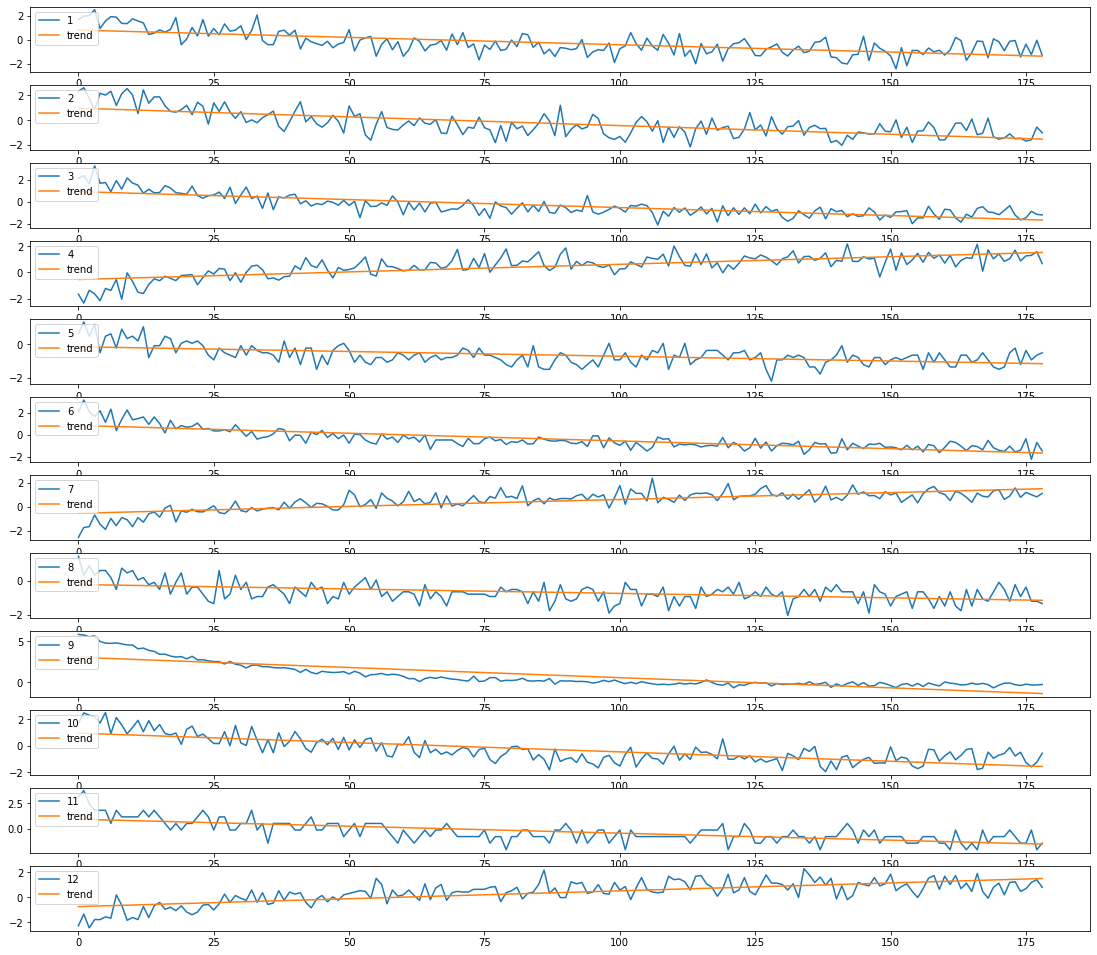

In [18]:
time = df.loc[engine_num,'cycles']
cols = df.columns[2:-1]
fig, axes = plt.subplots(len(cols), 1 , figsize=(19,17))
for col,ax in zip(range(standard_sensors.shape[1]), axes):
    ax.plot(time,standard_sensors[row_sl,col],label=col+1)
    ax.plot(time,y_pred[:,col],label='trend')
    ax.legend(loc=2)

In [19]:
row_name = df.loc[engine_num].iloc[-1].name #

In [20]:
def lin_slopes(standard_sensors, df, engine_num): #buat fungsi untuk mendapatkan nilai slopes dari kolom
    model = LinearRegression()
    x = df.loc[engine_num,'cycles'].values
    row_name = df.loc[engine_num].iloc[-1].name
    row_sl = df.index.get_loc(row_name) 
    y = standard_sensors[row_sl] 
    model.fit(x.reshape(-1, 1),y)
    slopes = model.coef_[:,0]
    return slopes
    

In [21]:
engines = df.index.unique().values
slopes = np.empty((standard_sensors.shape[1],len(engines)))
for i, engine in enumerate(engines):
    slopes[:, i] = lin_slopes(standard_sensors,df,engine) 

In [22]:
slopes_df = pd.DataFrame(slopes.T,index=engines,columns =raw_columns )
slopes_df.describe()

,sn_2,sn_3,sn_4,sn_7,sn_8,sn_11,sn_12,sn_13,sn_14,sn_15,sn_17,sn_20
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,-0.010975,-0.010625,-0.012324,0.011917,-0.010246,-0.012641,0.012249,-0.010271,-0.005574,-0.011670,-0.010988,0.011533
std,0.002842,0.002459,0.003010,0.003444,0.005552,0.003387,0.003736,0.005540,0.009765,0.002884,0.002383,0.002899
min,-0.018116,-0.016361,-0.019765,0.005189,-0.022287,-0.021425,0.005428,-0.023741,-0.025416,-0.019327,-0.016854,0.006681
25%,-0.012328,-0.012220,-0.013796,0.009588,-0.014121,-0.014375,0.009409,-0.013808,-0.012886,-0.013416,-0.012324,0.009329
50%,-0.010601,-0.010617,-0.012143,0.011197,-0.009827,-0.012485,0.011462,-0.009734,-0.003012,-0.011378,-0.010961,0.011151
75%,-0.009114,-0.008862,-0.010195,0.013892,-0.006127,-0.010143,0.014874,-0.006001,0.002402,-0.009384,-0.009305,0.013105
max,-0.005116,-0.005192,-0.007006,0.020537,-0.000914,-0.006454,0.022150,-0.000765,0.009362,-0.006841,-0.006122,0.019988


In [23]:
slope_order_idx = np.argsort(np.abs(slopes.mean(axis=1)))[::-1]
print('urutan sensor dengan slopes tertinggi \n{}'.format(raw_columns[slope_order_idx]))


urutan sensor dengan slopes tertinggi 
['sn_11' 'sn_4' 'sn_12' 'sn_7' 'sn_15' 'sn_20' 'sn_17' 'sn_2' 'sn_3'
 'sn_13' 'sn_8' 'sn_14']


# Reduksi Dimensi dengan PCA

In [24]:
jumlah_sensor_dengan_slopes_tertinggi = 6
pca_high_n_components = 3
# ambil 6 kolom dari standard sensor 'sn_11' 'sn_4' 'sn_12' 'sn_7' 'sn_15' 'sn_20'
sensors_high_trend = standard_sensors[:,slope_order_idx[0:jumlah_sensor_dengan_slopes_tertinggi]]
pca_high = PCA(pca_high_n_components,whiten=True)
pca_high.fit(sensors_high_trend)
sensors_pca=pca_high.transform(sensors_high_trend)
pca_high.explained_variance_ratio_

array([0.81658431, 0.04926907, 0.04473631])

In [25]:
cycles = np.empty(len(engines))
for i,engine_num in enumerate(engines):
    cycles[i] = 1 * df.loc[engine_num]['cycles'].max()

engines=df.index.unique().values # nomor mesin
engine_slices = dict()  

for i,engine_num in enumerate(engines):
    row_name=df.loc[engine_num].iloc[-1].name
    row_sl=df.index.get_loc(row_name) 
    engine_slices[engine_num]=row_sl

In [26]:
cycles_low = 1 # siklus pertama mesin dalam keadaan sehat
cycles_high = 247 #  siklus maksimum yang diharapkan
cycles_df = df['cycles'].values


In [27]:
idx_low_HI = [cycles_df<=cycles_low][0]
idx_high_HI  = [cycles_df == cycles_high][0]
low_HI_data= sensors_pca[idx_high_HI,:]
high_HI_data= sensors_pca[idx_low_HI,:]
X_HI = np.concatenate((high_HI_data,low_HI_data),axis=0) #gabungkan data 

In [28]:
y_one = np.ones(high_HI_data.shape[0])
y_zero = np.zeros(low_HI_data.shape[0])
y_HI = np.concatenate((y_one,y_zero),axis=0)

# Konstruksi HI Menggunakan SVR

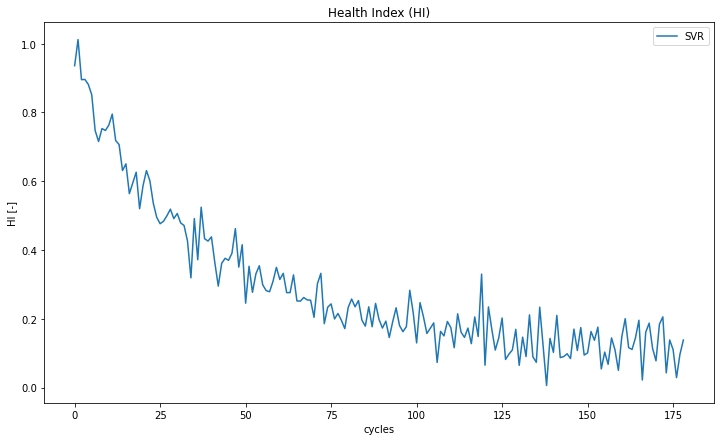

In [36]:
from sklearn.svm import SVR
engine_sensors=sensors_pca[engine_slices[engine_num],:]
cycles_engine = df.loc[engine_num]['cycles']
svr = SVR (kernel='linear', C=0.5, epsilon=0.001)
svr.fit(X_HI,y_HI)
HI_pred_svr = svr.predict(engine_sensors)
engine_num=3  
fig=plt.figure(figsize=(12,7))
plt.plot(cycles_engine,HI_pred_svr,label='SVR')
plt.title('Health Index (HI)')
plt.xlabel('cycles')
plt.ylabel('HI [-]')
plt.legend();

# Smoothing menggunakan Tsmoothie

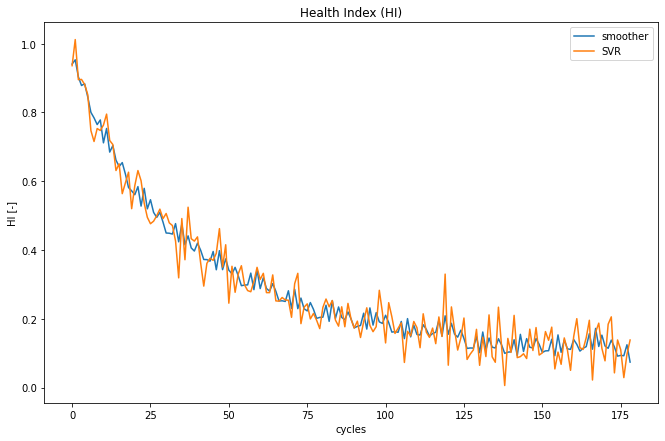

In [30]:
from tsmoothie.smoother import DecomposeSmoother
from sklearn.svm import SVR

def smooth(x):
    smoothed = []
    
    for i in range(x.shape[1]):
        
        smoother = DecomposeSmoother(smooth_type='lowess', periods=12,
                             smooth_fraction=0.5)
        smoother.smooth(data)
        smoothed.append(smoother.smooth_data[0])
    return np.array(smoothed)

engine_num = [3]

fig=plt.figure(figsize=(11,7))

engine_data_smooth = {}

for engine in engine_num:

    smoother = DecomposeSmoother(smooth_type='lowess', periods=12,
                             smooth_fraction=0.1)

    
    engine_sensors = sensors_pca[engine_slices[engine],:]
    cycles_engine = df.loc[engine]['cycles']
    HI_pred_svr = svr.predict(engine_sensors)
    smoother.smooth(HI_pred_svr)
    HI_pred_svr_smooth = smoother.smooth_data[0]
    df_engine = pd.DataFrame({"cycles_engine": cycles_engine, "HI": HI_pred_svr_smooth})
    engine_data_smooth[engine] = df_engine
    plt.plot(cycles_engine, HI_pred_svr_smooth,label='smoother')
    plt.plot(cycles_engine,HI_pred_svr,label='SVR')
    #plt.plot(cycles_engine,HI_pred_svr,label='SVR')

plt.title('Health Index (HI)')
plt.xlabel('cycles')
plt.ylabel('HI [-]')
plt.legend();

In [31]:
for engine in engine_data_smooth.keys():
    df_engine_smooth = engine_data_smooth[engine].sort_values(by="cycles_engine")    
    engine_num = df_engine_smooth.index[0]
    df_engine_smooth.to_csv(f"engine-data-{engine_num}.csv")

In [32]:
df_engine_smooth

,cycles_engine,HI
engine,,
3,0.0,0.940705
3,1.0,0.953046
3,2.0,0.903476
3,3.0,0.878366
3,4.0,0.883461
...,...,...
3,174.0,0.091337
3,175.0,0.093495
3,176.0,0.092514


# Prediksi RUL

In [33]:
x_eval = df_engine_smooth["cycles_engine"].to_numpy().reshape(len(df_engine_smooth), -1)
y_eval = df_engine_smooth["HI"].to_numpy().reshape(len(df_engine_smooth), -1)
model_eval = SVR (kernel='linear', C=0.5, epsilon=0.002)
model_eval.fit(x_eval, y_eval)

C:\Users\Yusiran\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SVR(C=0.5, epsilon=0.002, kernel='linear')

In [34]:
last_data = 150

is_converged = False

while not is_converged:
    output = model_eval.predict(np.array([last_data]).reshape(1, -1))
    print(last_data, output)
    if output < 0:
        is_converged = True
        break
    last_data += 1


150 [0.08610224]
151 [0.08326837]
152 [0.08043449]
153 [0.07760061]
154 [0.07476674]
155 [0.07193286]
156 [0.06909898]
157 [0.06626511]
158 [0.06343123]
159 [0.06059735]
160 [0.05776348]
161 [0.0549296]
162 [0.05209572]
163 [0.04926185]
164 [0.04642797]
165 [0.04359409]
166 [0.04076022]
167 [0.03792634]
168 [0.03509246]
169 [0.03225859]
170 [0.02942471]
171 [0.02659083]
172 [0.02375696]
173 [0.02092308]
174 [0.0180892]
175 [0.01525533]
176 [0.01242145]
177 [0.00958757]
178 [0.0067537]
179 [0.00391982]
180 [0.00108594]
181 [-0.00174793]


# Evaluasi

In [35]:
true_rul = 178 # untuk engine 3
predict_rul = 180
error = predict_rul - true_rul
print(error)

2
